### Accessing INCA data

This Notebook showcases how to access the INCA-hourly data from the EODC stac catalogue.

Necessary Imports:

In [ ]:
import pystac.client as pc
import xarray as xr
import matplotlib.pyplot as plt
from dask.distributed import LocalCluster
from pyproj import Transformer, CRS

To load data, you can use Dask:

In [ ]:
client = LocalCluster().get_client()
client.dashboard_link

First you need to access the incal-hourly collection from the eodc stac catalogue. It only has one item, which is the whole zarr store, ranging from 15.03.2011 until present.

In [ ]:
pc_client=pc.Client.open("https://dev.stac.eodc.eu/api/v1")
search = pc_client.search(collections=["incal-hourly"])
item = search.item_collection()[0]
item

To access the store with xarray you can use `xarray.open_zarr` with the href provided in *item.assets["zarr_store"]*

In [ ]:
ds = xr.open_zarr(item.assets["zarr_store"].href)
ds

The coordinate system of the dataset is MGI / Austria Lambert (EPSG: 31278). Using pyproj you can transform WGS84 coordinates.

In [ ]:
transformer = Transformer.from_crs("EPSG:4326", ds.attrs["crs"], always_xy=True)
lon, lat = 16.374105, 48.199546
x, y = transformer.transform(lon, lat)

You can easily extract a timeseries from the dataset:

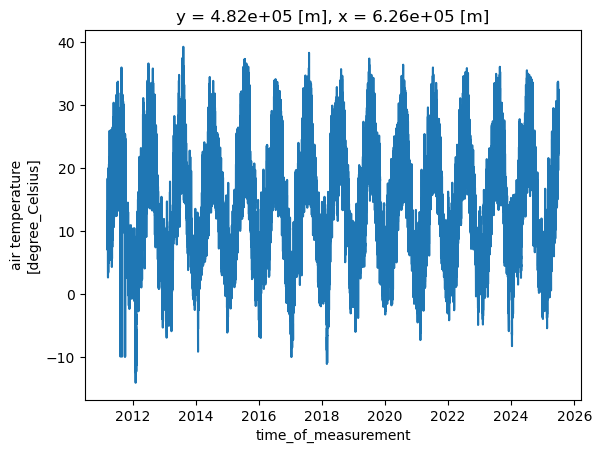

In [6]:
temp_vienna_ts = ds.sel(x=x, y=y, method='nearest')["T2M"].compute()
temp_vienna_ts.plot()

Or show an areal image

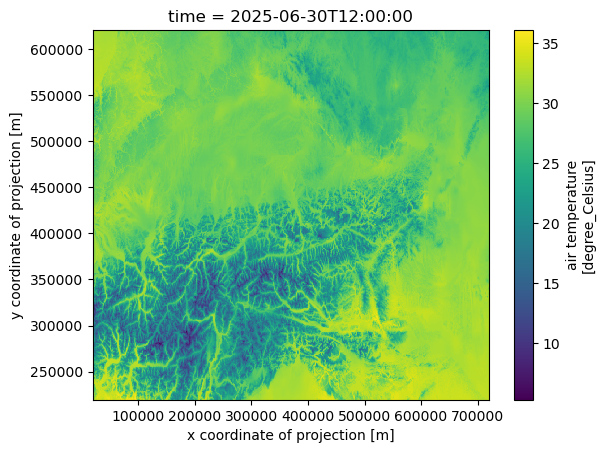

In [17]:
temp_aut = ds.sel(time="2025-06-30T12:00:00.000000000")["T2M"].compute()
temp_aut.plot()